# Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import random
%matplotlib inline 

In [2]:
plt.style.use('seaborn-poster')

## Import experiment data

In [3]:
#experimentData = pd.read_csv('Experiments/3. Real world validation/3. Real world data validation-table_1.csv', skiprows=6)
experimentData = pd.read_csv('Experiments/5. Main Experiment/Experiment_1.csv', skiprows=6)

In [4]:
# Subset columns
cols = ['[run number]', '[step]', 'random_tests_percentage', 'SusceptibleAgents', 'ExposedAgents',\
 'InfectedAAgents', 'InfectedMAgents', 'InfectedSAgents', 'InfectedCAgents', 'RecoveredAgents', 'DeadAgents', \
 'cumulativeConfirmedCases', 'cumulativeConfirmedRandomCases', 'cumulativeNegativeRandomCases']
experimentData = experimentData[cols]

# rename columns
cols = ['run', 'step', 'random_tests_percentage', 'SusceptibleAgents', 'ExposedAgents',\
 'InfectedAAgents', 'InfectedMAgents', 'InfectedSAgents', 'InfectedCAgents', 'RecoveredAgents', 'DeadAgents', \
 'cumulativeConfirmedCases', 'cumulativeConfirmedRandomCases', 'cumulativeNegativeRandomCases']
experimentData.columns = cols

## Group by random tests percentage

In [15]:
results = experimentData.groupby(['run', 'random_tests_percentage'], as_index=False).agg({'DeadAgents' : 'max'})

In [16]:
base = results[results['random_tests_percentage'] == 0]
scenario1 = results[results['random_tests_percentage'] == 0.1]
scenario2 = results[results['random_tests_percentage'] == 0.2]
scenario3 = results[results['random_tests_percentage'] == 0.3]
scenario4 = results[results['random_tests_percentage'] == 0.4]
scenario5 = results[results['random_tests_percentage'] == 0.5]

## Calculate difference of two means

The Null hypothesis is that the samples are drawn from populations with the same population means.  If the p-value is smaller than our threshold of 5%, then we have evidence against the null hypothesis of equal population means.

Levene’s test for equal variance can be carried out to check that variances are equal for all samples. The test can be used to check the assumption of equal variances before running a parametric test like One-Way ANOVA in Python. If your data is not following a normal distribution Levene’s test is preferred before Barlett’s.

In [17]:
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import mannwhitneyu

In [18]:
a = base.loc[:, 'DeadAgents']
s1 = scenario1.loc[:, 'DeadAgents']
s2 = scenario2.loc[:, 'DeadAgents']
s3 = scenario3.loc[:, 'DeadAgents']
s4 = scenario4.loc[:, 'DeadAgents']
s5 = scenario5.loc[:, 'DeadAgents']

In [79]:
1.96 + (a.std() / np.sqrt(300))

2.053380104541555

In [90]:
def descStats(x):
    CI_lower = x.mean() - (1.96 * (x.std() / np.sqrt(300)))
    CI_upper = x.mean() + (1.96 * (x.std() / np.sqrt(300)))
    return x.mean(), x.std(), CI_lower, CI_upper

In [91]:
descStats(a)

(2.31, 1.6173908548206661, 2.126974995098552, 2.493025004901448)

In [92]:
descStats(s1)

(2.3033333333333332, 1.7305021471120514, 2.1075085807615332, 2.499158085905133)

In [93]:
descStats(s2)

(2.0933333333333333,
 1.5618643634628049,
 1.9165917424394783,
 2.2700749242271883)

In [94]:
descStats(s3)

(2.1066666666666665,
 1.5241497072101717,
 1.9341928908930224,
 2.2791404424403106)

In [95]:
descStats(s4)

(2.02, 1.5581053583414404, 1.843683780579411, 2.1963162194205887)

In [96]:
descStats(s5)

(2.066666666666667, 1.6323103296441823, 1.881953364255336, 2.2513799690779974)

### Test for Normality

In [21]:
shapiro(a)

ShapiroResult(statistic=0.9261698722839355, pvalue=4.959744073773642e-11)

In [22]:
shapiro(s1)

ShapiroResult(statistic=0.9105143547058105, pvalue=2.264694725154226e-12)

In [23]:
shapiro(s2)

ShapiroResult(statistic=0.9227572679519653, pvalue=2.4450958618915664e-11)

In [24]:
shapiro(s3)

ShapiroResult(statistic=0.9244821071624756, pvalue=3.486663735507989e-11)

In [25]:
shapiro(s4)

ShapiroResult(statistic=0.9054238200187683, pvalue=8.980246017295523e-13)

In [26]:
shapiro(s5)

ShapiroResult(statistic=0.9063238501548767, pvalue=1.054944976860983e-12)

### Test for equal variance

In [27]:
levene(a, s1)

LeveneResult(statistic=1.1651872699718575, pvalue=0.2808275144057998)

In [28]:
levene(a, s2)

LeveneResult(statistic=0.013853210536882722, pvalue=0.9063451553730657)

In [29]:
levene(a, s3)

LeveneResult(statistic=0.3415408046706411, pvalue=0.5591615905929357)

In [30]:
levene(a, s4)

LeveneResult(statistic=0.0015303589433868225, pvalue=0.9688079291689023)

In [31]:
levene(a, s5)

LeveneResult(statistic=0.0013873486792348416, pvalue=0.9703003908034008)

### Test for difference in means

#### T-Test (parametric)

In [32]:
ttest_ind(a, s1, axis=0, equal_var=True)

Ttest_indResult(statistic=0.048748927833436526, pvalue=0.9611356601756811)

In [33]:
ttest_ind(a, s2, axis=0, equal_var=False)

Ttest_indResult(statistic=1.6690759790304261, pvalue=0.09562635764249908)

In [34]:
ttest_ind(a, s3, axis=0, equal_var=False)

Ttest_indResult(statistic=1.584711945951623, pvalue=0.11356230610949314)

In [35]:
ttest_ind(a, s4, axis=0, equal_var=False)

Ttest_indResult(statistic=2.236589846197715, pvalue=0.02568155293123946)

In [36]:
ttest_ind(a, s5, axis=0, equal_var=False)

Ttest_indResult(statistic=1.8341262435660008, pvalue=0.06713201813778627)

#### Mann Whitney U Test (non-parametric)
The hypothesis is one-sided where we want to check whether the number of deaths is greater in a population of 

In [37]:
mannwhitneyu(a, s1, alternative='greater')

MannwhitneyuResult(statistic=45826.5, pvalue=0.34582545466108683)

In [38]:
mannwhitneyu(a, s2, alternative='greater')

MannwhitneyuResult(statistic=48297.0, pvalue=0.05666387868892259)

In [39]:
mannwhitneyu(a, s3, alternative='greater')

MannwhitneyuResult(statistic=47939.5, pvalue=0.07881522995053614)

In [40]:
mannwhitneyu(a, s4, alternative='greater')

MannwhitneyuResult(statistic=50032.5, pvalue=0.007734610300772811)

In [41]:
mannwhitneyu(a, s5, alternative='greater')

MannwhitneyuResult(statistic=49292.5, pvalue=0.019524229851639353)

## Plots

### Average number of deaths in each scenario

In [42]:
plotData = experimentData.groupby(['step', 'random_tests_percentage'], as_index=False).agg({'DeadAgents' : 'mean'})

In [43]:
t = plotData.loc[plotData['random_tests_percentage'] == 0, 'step']
D_base = plotData.loc[plotData['random_tests_percentage'] == 0, 'DeadAgents']
D_1 = plotData.loc[plotData['random_tests_percentage'] == 0.1, 'DeadAgents']
D_2 = plotData.loc[plotData['random_tests_percentage'] == 0.2, 'DeadAgents']
D_3 = plotData.loc[plotData['random_tests_percentage'] == 0.3, 'DeadAgents']
D_4 = plotData.loc[plotData['random_tests_percentage'] == 0.4, 'DeadAgents']
D_5 = plotData.loc[plotData['random_tests_percentage'] == 0.5, 'DeadAgents']

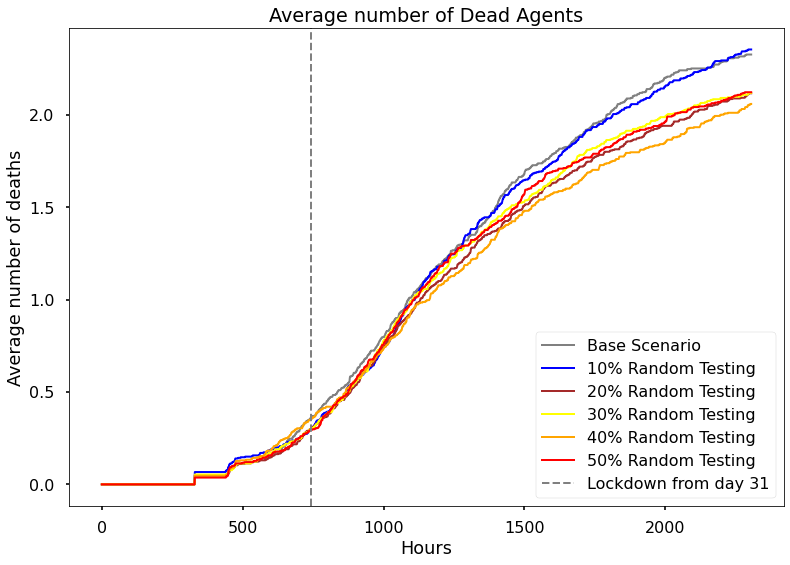

In [44]:
fig, ax = plt.subplots()

# Plot data
ax.plot(t, D_base, color='grey', linewidth=2, label='Base Scenario')
ax.plot(t, D_1, color='blue', linewidth=2, label='10% Random Testing')
ax.plot(t, D_2, color='brown', linewidth=2, label='20% Random Testing')
ax.plot(t, D_3, color='yellow', linewidth=2, label='30% Random Testing')
ax.plot(t, D_4, color='orange', linewidth=2, label='40% Random Testing')
ax.plot(t, D_5, color='red', linewidth=2, label='50% Random Testing')
plt.axvline(x = 31 * 24, label='Lockdown from day 31', color='grey', linewidth=2, linestyle='--')

# Add titles
ax.set_title('Average number of Dead Agents')
ax.set_xlabel('Hours')
ax.set_ylabel('Average number of deaths')
ax.legend()
plt.show()

# Testing Capacity

In [56]:
experimentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133314 entries, 0 to 4133313
Data columns (total 15 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   run                             int64  
 1   step                            int64  
 2   random_tests_percentage         float64
 3   SusceptibleAgents               int64  
 4   ExposedAgents                   int64  
 5   InfectedAAgents                 int64  
 6   InfectedMAgents                 int64  
 7   InfectedSAgents                 int64  
 8   InfectedCAgents                 int64  
 9   RecoveredAgents                 int64  
 10  DeadAgents                      int64  
 11  cumulativeConfirmedCases        int64  
 12  cumulativeConfirmedRandomCases  int64  
 13  cumulativeNegativeRandomCases   int64  
 14  day                             int64  
dtypes: float64(1), int64(14)
memory usage: 473.0 MB


In [5]:
experimentData['day'] = experimentData['step'] // 24

In [71]:
def plotTestingCapacity(random):
    randomCases = experimentData.loc[experimentData['random_tests_percentage'] == random, :]
    randomCases = experimentData.groupby(['run', 'day', 'random_tests_percentage'], as_index=False).agg({'cumulativeNegativeRandomCases' : 'max', 'cumulativeConfirmedRandomCases' : 'max', 'cumulativeConfirmedCases' : 'max'})
    randomCases['dailyNegCases'] = randomCases['cumulativeNegativeRandomCases'].diff().fillna(0)
    randomCases['dailyPosCases'] = randomCases['cumulativeConfirmedRandomCases'].diff().fillna(0)
    randomCases['dailyConfirmedCases'] = randomCases['cumulativeConfirmedCases'].diff().fillna(0)
    randomCases['dailyTotal'] = randomCases['dailyConfirmedCases'] + randomCases['dailyPosCases'] + randomCases['dailyNegCases']
    randomCases = randomCases.groupby('day', as_index=False).agg({'cumulativeNegativeRandomCases' : 'mean', 'cumulativeConfirmedRandomCases' : 'mean', 'cumulativeConfirmedCases' : 'mean', 'dailyTotal' : 'mean'})
    randomCases.loc[randomCases['dailyTotal'] < 0, 'dailyTotal'] = 0
    
    #plot
    fig, ax = plt.subplots()

    ax.plot(randomCases['day'], randomCases['dailyTotal'], label='Number of tests performed')
    plt.axhline(26, label='Testing capacity', color='grey', linewidth=2, linestyle='--')

    # Add titles
    ax.set_title('Testing capacity with random testing set to {}'.format(random))
    ax.set_xlabel('days')
    ax.set_ylabel('Number of tests performed')
    ax.legend()
    plt.show()

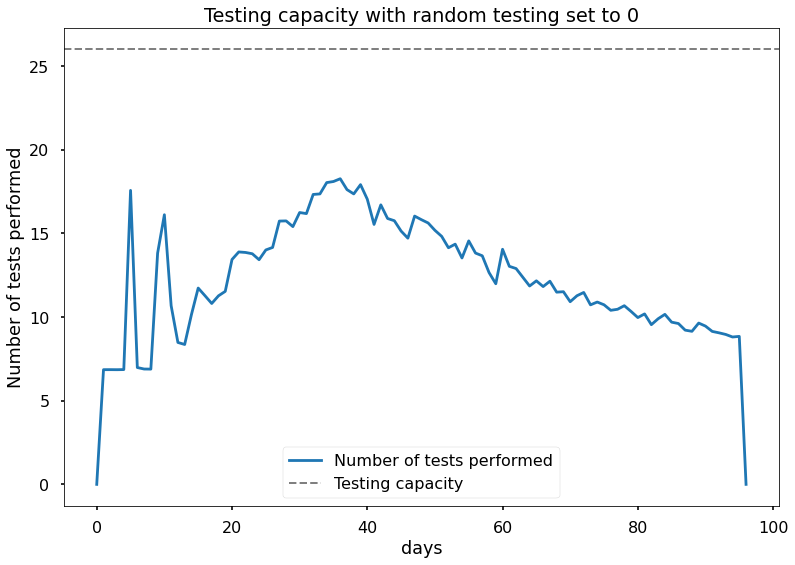

In [73]:
plotTestingCapacity(0)

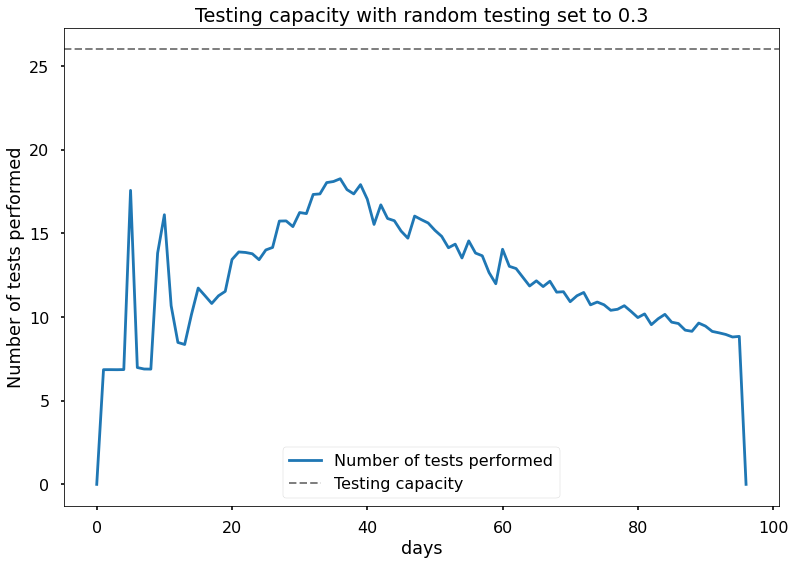

In [74]:
plotTestingCapacity(0.3)

In [36]:
randomCases = experimentData.groupby(['run', 'day', 'random_tests_percentage'], as_index=False).agg({'cumulativeNegativeRandomCases' : 'max', 'cumulativeConfirmedRandomCases' : 'max', 'cumulativeConfirmedCases' : 'max'})

In [38]:
randomCases['dailyNegCases'] = randomCases['cumulativeNegativeRandomCases'].diff().fillna(0)

In [39]:
randomCases['dailyPosCases'] = randomCases['cumulativeConfirmedRandomCases'].diff().fillna(0)

In [40]:
randomCases['dailyConfirmedCases'] = randomCases['cumulativeConfirmedCases'].diff().fillna(0)

In [41]:
randomCases['dailyTotal'] = randomCases['dailyConfirmedCases'] + randomCases['dailyPosCases'] + randomCases['dailyNegCases']

In [43]:
a = randomCases.groupby('day', as_index=False).agg({'cumulativeNegativeRandomCases' : 'mean', 'cumulativeConfirmedRandomCases' : 'mean', 'cumulativeConfirmedCases' : 'mean', 'dailyTotal' : 'mean'})

In [44]:
a.loc[a['dailyTotal'] < 0, 'dailyTotal'] = 0

In [45]:
a

,day,cumulativeNegativeRandomCases,cumulativeConfirmedRandomCases,cumulativeConfirmedCases,dailyTotal
0,0,6.802222,0.031111,0.031111,0.000000
1,1,13.612222,0.054444,0.054444,6.856667
2,2,20.420556,0.079444,0.079444,6.858333
3,3,27.232222,0.101111,0.101111,6.855000
4,4,34.036667,0.130000,0.130000,6.862222
...,...,...,...,...,...
92,92,623.475624,10.179138,538.727324,9.059524
93,93,630.449801,10.221781,541.077141,8.961997
94,94,637.223483,10.263755,543.071469,8.809983
95,95,644.027242,10.309308,545.144722,8.846765


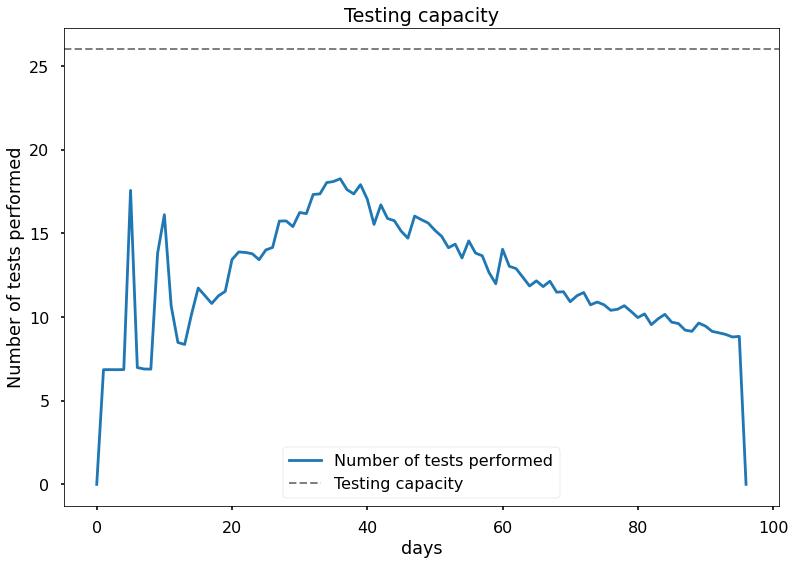

In [51]:
fig, ax = plt.subplots()

ax.plot(a['day'], a['dailyTotal'], label='Number of tests performed')
plt.axhline(26, label='Testing capacity', color='grey', linewidth=2, linestyle='--')

# Add titles
ax.set_title('Testing capacity')
ax.set_xlabel('days')
ax.set_ylabel('Number of tests performed')
ax.legend()
plt.show()

In [34]:
a

,day,dailyTotal
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
28988,92,4.0
28989,93,0.0
28990,94,2.0
28991,95,3.0


In [20]:
randomCases = experimentData.groupby(['random_tests_percentage', 'run'], as_index=False).agg({'cumulativeConfirmedRandomCases' : 'max', 'cumulativeNegativeRandomCases' : 'max'})

In [21]:
randomCases['cumulativeConfirmedRandomCases'].mean()

10.178888888888888

In [22]:
randomCases['cumulativeNegativeRandomCases']

0          0
1          0
2          0
3          0
4          0
        ... 
1795    1223
1796    1232
1797    1234
1798    1227
1799    1240
Name: cumulativeNegativeRandomCases, Length: 1800, dtype: int64

In [25]:
randomCases = randomCases.groupby(['random_tests_percentage'], as_index=False).agg({'cumulativeConfirmedRandomCases' : 'mean', 'cumulativeNegativeRandomCases' : 'mean'})

In [27]:
randomCases['rate'] = randomCases['cumulativeConfirmedRandomCases'] / (randomCases['cumulativeConfirmedRandomCases'] + randomCases['cumulativeNegativeRandomCases'])

In [28]:
randomCases

,random_tests_percentage,cumulativeConfirmedRandomCases,cumulativeNegativeRandomCases,rate
0,0.0,0.000000,0.000000,NaN
1,0.1,4.643333,282.186667,0.016188
2,0.2,8.976667,565.323333,0.015631
3,0.3,12.193333,754.900000,0.015896
4,0.4,16.526667,1034.853333,0.015719
5,0.5,18.733333,1218.000000,0.015147
